In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


In [9]:
matches_df = pd.read_csv('../Datasets/final_feature_dataset.csv')
matches_df.head()
# matches_df.columns
# matches_df.shape

,Season,Home Team,Away Team,Home Goals,Away Goals,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Home Team Form,Away Team Form,Home Team Cumulative Points,Away Team Cumulative Points,Winner
0,2014-2015,Manchester Utd,Swansea City,1,2,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0.0,0.0,0,0,-1
1,2014-2015,West Brom,Sunderland,2,2,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0.0,0.0,0,0,0
2,2014-2015,Leicester City,Everton,2,2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0.0,0.0,0,0,0
3,2014-2015,West Ham,Tottenham,0,1,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0.0,0.0,0,0,-1
4,2014-2015,QPR,Hull City,0,1,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0.0,0.0,0,0,-1


In [10]:
X = matches_df.drop(["Winner","Season",'Home Goals','Away Goals',"Home Team","Away Team"], axis=1)
y = matches_df["Winner"]

# categorical_columns = ["Home Team", "Away Team"]
# numerical_columns = [col for col in X.columns if col not in categorical_columns]

label_mapping = {-1: 0, 0: 1, 1: 2}
y_mapped = y.map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10)

Epoch 1/1000


c:\Users\vimal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4392 - loss: 1.1941 - val_accuracy: 0.4684 - val_loss: 1.0470
Epoch 2/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4493 - loss: 1.0585 - val_accuracy: 0.4684 - val_loss: 1.0377
Epoch 3/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4381 - loss: 1.0528 - val_accuracy: 0.4684 - val_loss: 1.0271
Epoch 4/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4454 - loss: 1.0408 - val_accuracy: 0.4684 - val_loss: 1.0172
Epoch 5/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4425 - loss: 1.0378 - val_accuracy: 0.4750 - val_loss: 1.0045
Epoch 6/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.4933 - loss: 1.0329 - val_accuracy: 0.5671 - val_loss: 0.9945
Epoch 7/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5195 - loss: 1.0084 - val_accuracy: 0.5658 - val_loss: 0.9921
Epoch 8/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5362 - loss: 1.0056 - val_accurac

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 0.7208
Test Loss: 0.7449454665184021
Test Accuracy: 0.6684210300445557
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


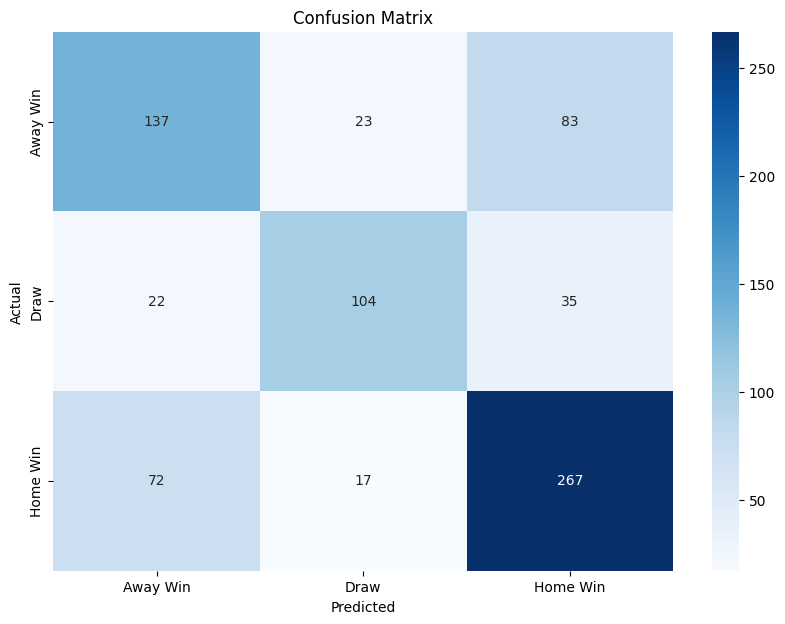

Class: Away Win, Accuracy: 0.5930735930735931
Class: Draw, Accuracy: 0.7222222222222222
Class: Home Win, Accuracy: 0.6935064935064935
Class: macro avg, Accuracy: 0.6696007696007696
Class: weighted avg, Accuracy: 0.6674775955039113


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

label_mapping = {0: 'Away Win', 1: 'Draw', 2: 'Home Win'}

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report_dict = classification_report(y_test, y_pred_classes, target_names=['Away Win', 'Draw', 'Home Win'], output_dict=True)
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        print(f"Class: {label}, Accuracy: {metrics['precision']}")

In [13]:
# def create_model(optimizer='adam', activation='sigmoid'):
#     model = Sequential([
#         Dense(128, input_dim=X_train.shape[1], activation=activation),
#         Dense(64, activation=activation),
#         Dense(32, activation=activation),
#         Dense(3, activation='softmax')
#     ])
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=64, verbose=0)


In [14]:
# param_grid = {
#     'optimizer': ['Adam'],
#     'epochs': [1000],
#     'batch_size': [64]
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")